# **Исследование данных сервиса аренды самокатов GoFast**

В нашем распоряжении данные сервиса аренды самокатов GoFast о некоторых пользоватялеях из нескольких городов, об их поездках и о типах подписок данного сервиса. Нужно проанализировать данные и проверить несколько гипотез, чтобы помочь бизнесу вырасти.

Пользователи берут самокаты в аренду с помощью мобильного приложения, которым можно пользоваться с разными тарифами - без подписки или с подпиской `ultra`.


**Цель исследования:**


1. Узнать, тратят ли пользователи с подпиской больше времени на поездки - то есть, являются ли пользователи с подпиской выгодными для сервиса.
2. Выяснить, является ли среднее расстояние, проделываемое пользователями с подпиской за одну поездку, оптимальным с точки зрения износа самоката.
3. Проверить, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.


    **Ход исследования:**


   Данные о пользователях я получу из файла `/datasets/users_go.csv`, о поездках - из `/datasets/rides_go.csv`, о тарифах - из `/datasets/subscriptions_go.csv`. В данных могут быть ошибки, поэтому предварительно я займусь предобработкой данных, чтобы быть уверенной в том, что ошибки не повлияют на ход анализа. Если же я пойму, что ошибки критичны, я исправлю их там, где это будет возможно. Затем я приступлю к исследовательскому анализу. Далее я создам сводные таблицы и объединю три датафрейма в один для удобного анализа и дальнейшей проверки гипотез.

   В итоге, мое исследование пройдет в 7 этапов:

   - Загрузка данных
   - Предобработка данных
   - Исследовательский анализ данных
   - Объединение данных
   - Подсчёт выручки
   - Проверка гипотез
   - Общий вывод

## Загрузка данных

Для начала импортируем библиотеки *pandas, matplotlib, numpy, scipy.stats* и сохраним датасеты, выведем на экран первые 5 строк каждого из них, чтобы посмотреть на содержимое, и изучим общую информацию датафреймов:

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy import stats as st

In [5]:
try:
    rides_data = pd.read_csv('jupyter_projects/rides_go.csv')
except:
    rides_data = pd.read_csv('/datasets/rides_go.csv')
    
try:
    subscriptions_data = pd.read_csv('jupyter_projects/subscriptions_go.csv')
except:
    subscriptions_data = pd.read_csv('/datasets/subscriptions_go.csv')
    
try:
    users_data = pd.read_csv('jupyter_projects/users_go.csv')
except:
    users_data = pd.read_csv('/datasets/users_go.csv')

In [6]:
rides_data.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
subscriptions_data.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subscriptions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


In [10]:
users_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [11]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Отлично! Пропусков нигде нет, нужно будет поработать с типами данных и дубликатами.

## Предобработка данных

### Преобразование типов данных

In [12]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d')
rides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Теперь столбец `date` принадлежит типу данных `datetime`.

In [13]:
rides_data['month'] = pd.DatetimeIndex(rides_data['date']).month
rides_data.head(3)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4


In [14]:
pd.DatetimeIndex(rides_data['date']).year.unique()

Index([2021], dtype='int32', name='date')

Отлично, все данные датируются 2021 годом, значит путаницы в месяцах не будет.

### Обработка пропусков

In [15]:
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [16]:
subscriptions_data.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [17]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Замечательно, пропусков действительно нет, как мы и подметили, изучив общую информацию о датафреймах.

### Обработка дубликатов

Не будем проверять наличие дубликатов в датафрейме `subscriptions_data`, там всего две строки, относящиеся к двум разным типам подписок.

In [18]:
rides_data.duplicated().sum()

0

In [19]:
users_data.duplicated().sum()

31

In [20]:
users_data = users_data.drop_duplicates(keep='first')
users_data.duplicated().sum()

0

Дубликатов не осталось, идем дальше.

## Исследовательский анализ данных

### Частота встречаемости городов

In [21]:
users_data['city'].value_counts().sort_values(ascending=False).to_frame()

,count
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


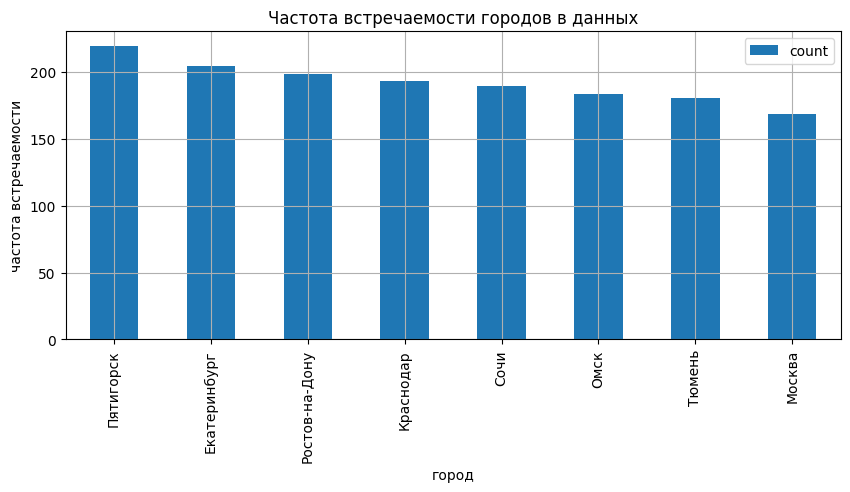

In [22]:
ax = users_data['city'].value_counts().plot.bar(figsize=(10,4))
plt.xlabel('город')
plt.ylabel('частота встречаемости')
plt.grid()
plt.title('Частота встречаемости городов в данных')
plt.legend();

**Вывод:** Самый часто встречаемый город пользователей самокатов в таблице - Пятигорск, самый редкий - Москва.

### Соотношение пользователей с подпиской и без подписки

In [23]:
users_data['subscription_type'].value_counts().to_frame()

,count
subscription_type,
free,835
ultra,699


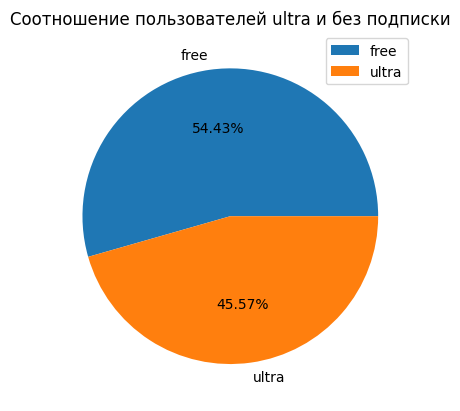

In [24]:
fig, ax = plt.subplots()
ax.pie(users_data['subscription_type'].value_counts(), labels=['free', 'ultra'], autopct='%1.2f%%')
plt.title('Соотношение пользователей ultra и без подписки')
plt.legend();

**Вывод:** Пользователей без подписки на 9% больше, чем пользователей с подпиской.

### Возраст пользователей

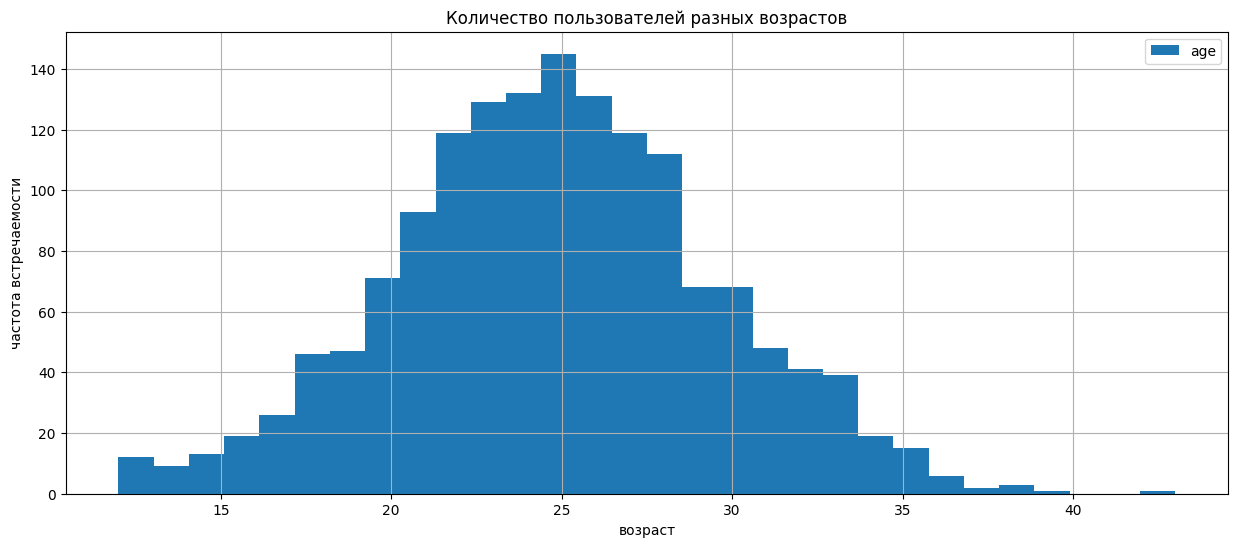

In [25]:
users_data['age'].plot(kind = 'hist', figsize = (15,6), bins = 30);
plt.xlabel('возраст')
plt.ylabel('частота встречаемости')
plt.grid()
plt.title('Количество пользователей разных возрастов')
plt.legend();

**Вывод:** Чаще всего сервис аренды самокатов используют люди в возрасте от 20 до 30 лет, реже других - дети и взрослые около 40 лет.

### Расстояние, которое пользователь преодолел за одну поездку

In [26]:
rides_data['distance'].describe().to_frame()

,distance
count,18068.000000
mean,3070.659976
std,1116.831209
min,0.855683
25%,2543.226360
50%,3133.609994
75%,3776.222735
max,7211.007745


In [27]:
rides_data['distance_km'] = round(rides_data['distance'] / 1000, 1)
rides_data.head()

,user_id,distance,duration,date,month,distance_km
0,1,4409.919140,25.599769,2021-01-01,1,4.4
1,1,2617.592153,15.816871,2021-01-18,1,2.6
2,1,754.159807,6.232113,2021-04-20,4,0.8
3,1,2694.783254,18.511000,2021-08-11,8,2.7
4,1,4028.687306,26.265803,2021-08-28,8,4.0


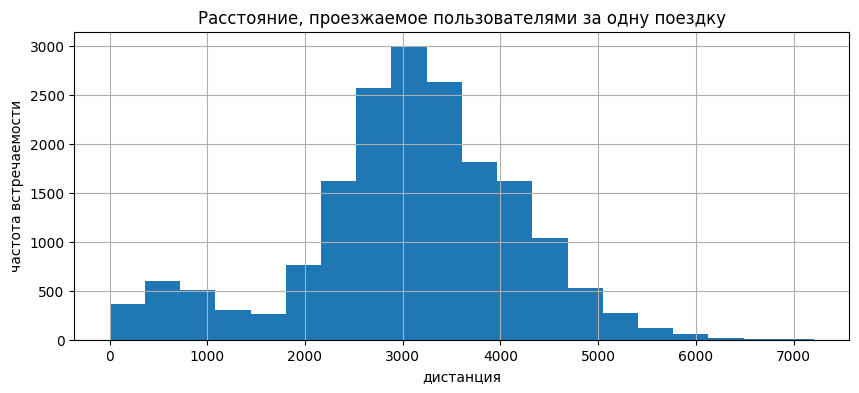

In [28]:
plt.xlabel('дистанция')
plt.ylabel('частота встречаемости')
rides_data['distance'].hist(figsize = (10, 4), bins = 20)
plt.title('Расстояние, проезжаемое пользователями за одну поездку');

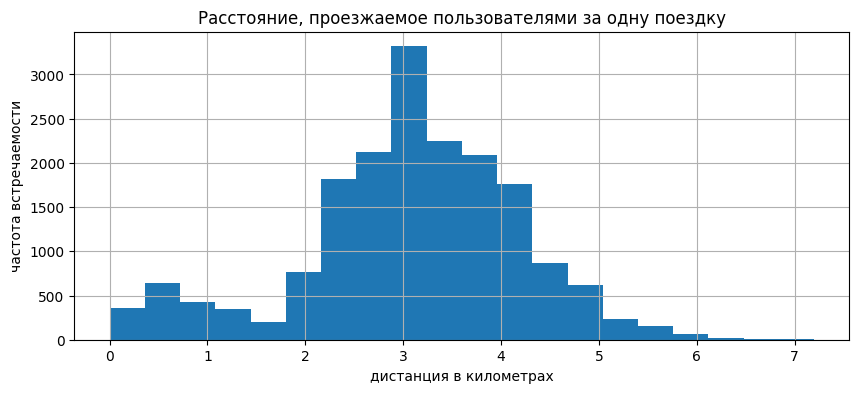

In [29]:
plt.xlabel('дистанция в километрах')
plt.ylabel('частота встречаемости')
rides_data['distance_km'].hist(figsize = (10, 4), bins = 20)
plt.title('Расстояние, проезжаемое пользователями за одну поездку');

**Вывод:** В большинстве случаев пользователи проезжают на самокатах около 3 километров, основная масса арендаторов проходит путь от 2 до 4,5 километров, больше 5 км проезжают немногие. Среди тех, чья дистанция короче 2 километров, наиболее распространены маршруты по 500 метров.

### Продолжительность поездок

In [30]:
rides_data['duration'].describe().to_frame()

,duration
count,18068.000000
mean,17.805011
std,6.091051
min,0.500000
25%,13.597563
50%,17.678395
75%,21.724800
max,40.823963


Медиана и среднее арифметическое практически совпадают, значит распределение симметрично относительно медианы и близко к нормальному.

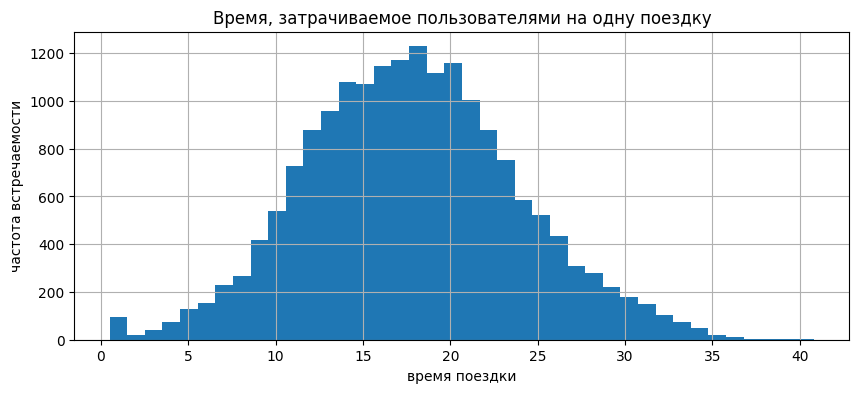

In [31]:
plt.xlabel('время поездки')
plt.ylabel('частота встречаемости')
rides_data['duration'].hist(figsize = (10, 4), bins = 40)
plt.title('Время, затрачиваемое пользователями на одну поездку');

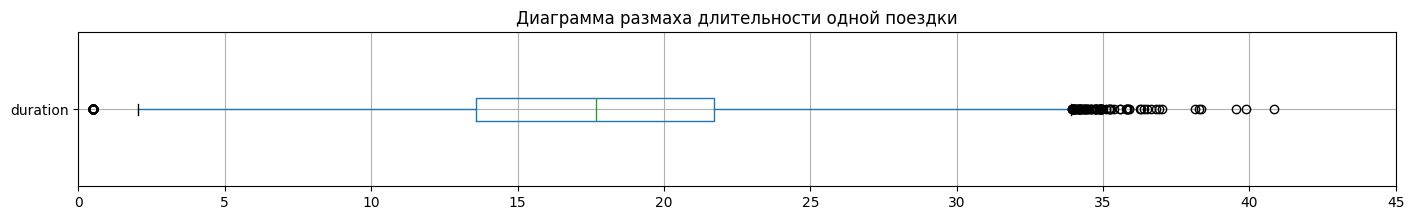

In [32]:
fig, ax = plt.subplots(figsize = (17,2))
ax = rides_data[['duration']].boxplot(vert=False, ax=ax)
ax.set_title('Диаграмма размаха длительности одной поездки')
ax.set_xlim(0, 45);

**Вывод:** В среднем, люди тратят на поездку 17-18 минут, время поездки в большинстве случаев почти прямо пропорционально дистанции, что хорошо видно по графику, больше 30 минут люди редко затрачивают на путь, меньше 5-7 минут тоже редко, значения больше 34 и меньше 2 - выбросы.

## Объединение данных

### Объединение датафреймов

Объединим 3 датафрейма в один и выведем первые 5 строк таблицы, чтобы убедиться, что все сработало:

In [33]:
data = users_data.merge(rides_data, on='user_id', how='left')
data = data.merge(subscriptions_data, on='subscription_type', how='left')
data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,distance_km,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,4.4,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2.6,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,0.8,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2.7,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,4.0,6,0,199


Проверим размерность исходного датафрейма - `rides_data`, так как к нему мы присоединяли остальные столбцы, а также размер результирующего `data` - они должны совпадать:

In [34]:
if rides_data.shape[0] == data.shape[0]:
    print('Объединение прошло успешно')
else:
    print('Объединение неверно')

Объединение прошло успешно


### Создание 2 дополнительных датафреймов

In [35]:
free_users = data[data['subscription_type'] == 'free'].reset_index(drop=True)
free_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,distance_km,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,2.5,8,50,0
1,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,0.8,8,50,0
2,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,4.0,8,50,0
3,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,1.2,8,50,0
4,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,3.0,8,50,0


In [36]:
ultra_users = data[data['subscription_type'] == 'ultra'].reset_index(drop=True)
ultra_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,distance_km,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,4.4,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2.6,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,0.8,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2.7,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,4.0,6,0,199


Создали еще два датафрейма для пользователей без подписки - `free_users` и с подпиской - `ultra_users`. Проверим, что размерности этих двух датафреймов в сумме дают размер исходной таблицы:

In [37]:
if free_users.shape[0] + ultra_users.shape[0] == data.shape[0]:
    print('Объединение прошло успешно')
else:
    print('Объединение неверно')

Объединение прошло успешно


### Расстояние и время поездок для пользователей с разными типами подписок

Построим гистограммы на одном графике отдельно для дистанции и времени поездки у пользователей двух категорий, чтобы разница была нагляднее:

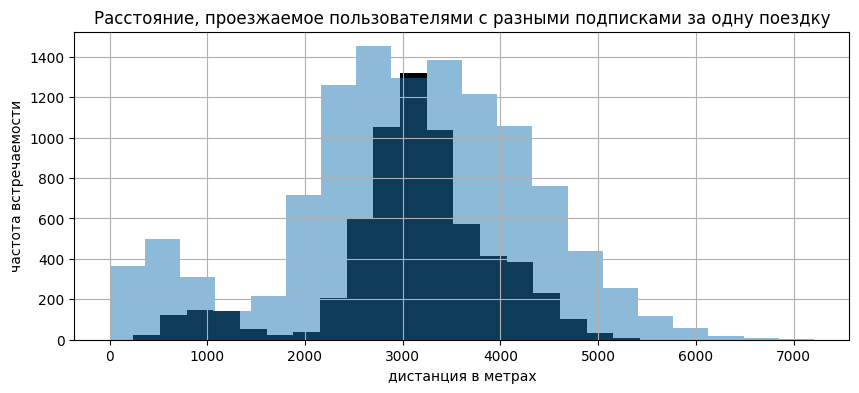

In [38]:
plt.xlabel('дистанция в метрах')
plt.ylabel('частота встречаемости')
plt.title('Расстояние, проезжаемое пользователями с разными подписками за одну поездку')
ultra_users['distance'].hist(
    figsize = (10, 4),
    bins = 20,
    color = 'black'
);

free_users['distance'].hist(
    figsize = (10, 4),
    bins = 20,
    alpha = 0.5
);

**Вывод:** Как минимум, пользователей без подписки больше, именно они задают пиковое значение в точке 500 метров и проезжают дистанции вплоть до 7 километров, еще один пик приходится на 2500 метров. У пользователей с подпиской нет историй с маршрутом длинее 5500 метров, пик в райное 3 километров, а также небольшой в точке 1 километр. В целом, значения распределены схожим образом у обоих типов пользователей.

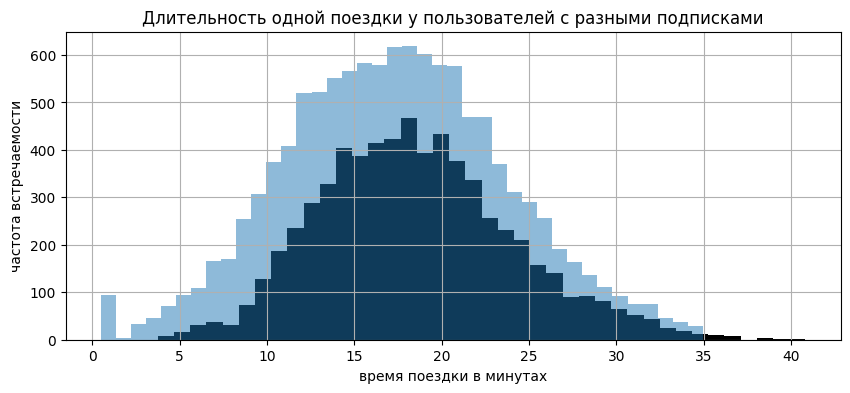

In [39]:
plt.xlabel('время поездки в минутах')
plt.ylabel('частота встречаемости')
plt.title('Длительность одной поездки у пользователей с разными подписками')
ultra_users['duration'].hist(
    figsize = (10, 4),
    bins = 40,
    color = 'black'
);

free_users['duration'].hist(
    figsize = (10, 4),
    bins = 40,
    alpha = 0.5
);

**Вывод:** Графики схожи, и те, и другие пользователи задают нормальное распределение значений, пик в районе 17-18 минут и у тех, и у других. У пользователей без подписки время поездки не превышает 35 минут, а вот у тех, кто имеет подписку, крайнее значение достигает 40 с лишним минут, но эти значения можно считать выбросами. Также, пользователи без подписки совершают крайне короткие поездки (1 минута), причем довольно часто, поездки пользователей с ultra, в свою очередь, длятся минимум 4 минуты.

## Подсчёт выручки

In [40]:
data['duration'] = np.ceil(data['duration']) 
total_data = data.pivot_table(index=['month','user_id'], aggfunc={'distance': ['sum', 'count'], 'duration': 'sum', 'minute_price': 'mean',
                                                                  'start_ride_price': 'mean', 'subscription_fee': 'mean'}).reset_index()
total_data.columns = ['month', 'user_id', 'rides', 'meters', 'minutes', 'minute_price', 'start_price', 'sub_fee'] 
total_data.head()

,month,user_id,rides,meters,minutes,minute_price,start_price,sub_fee
0,1,1,2,7027.511294,42.0,6.0,0.0,199.0
1,1,3,1,3061.777147,13.0,6.0,0.0,199.0
2,1,5,1,3914.646990,13.0,6.0,0.0,199.0
3,1,7,2,6478.080979,28.0,6.0,0.0,199.0
4,1,12,1,3577.151148,33.0,6.0,0.0,199.0


In [41]:
total_data.isna().sum()

month           0
user_id         0
rides           0
meters          0
minutes         0
minute_price    0
start_price     0
sub_fee         0
dtype: int64

Сделали сводную таблицу с агрегированными данными о поездках каждого пользователя, здесь `rides` - количество поездок за месяц, `meters` - общая дистанция в метрах за месяц, `minutes` - общее время поездок за месяц, остальные столбцы - стоимость минуты, старта и подписки в зависимости от ее типа.

In [42]:
total_data['earnings'] = total_data['minutes'] * total_data['minute_price'] + total_data['start_price'] * total_data['rides'] + total_data['sub_fee']
total_data.head()

,month,user_id,rides,meters,minutes,minute_price,start_price,sub_fee,earnings
0,1,1,2,7027.511294,42.0,6.0,0.0,199.0,451.0
1,1,3,1,3061.777147,13.0,6.0,0.0,199.0,277.0
2,1,5,1,3914.646990,13.0,6.0,0.0,199.0,277.0
3,1,7,2,6478.080979,28.0,6.0,0.0,199.0,367.0
4,1,12,1,3577.151148,33.0,6.0,0.0,199.0,397.0


Добавили стобец с помесячной выручкой с каждого пользователя.

## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки?

Проведем t-тест, все условия для его использования выполняются.
Для начала сформулируем гипотезы:
- H0: пользователи с подпиской и без подписки тратят одинаковое количество времени на поездки
- H1: пользователи с подпиской тратят больше времени на поездки

In [43]:
alpha = 0.05
results = st.ttest_ind(ultra_users['duration'], free_users['duration'], alternative='greater')

print(f'Среднее первой выборки: {np.mean(free_users["duration"])}')
print(f'Среднее второй выборки: {np.mean(ultra_users["duration"])}')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее первой выборки: 17.39090929866399
Среднее второй выборки: 18.54198516280583
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:** судя по р-значению вероятность получить наблюдаемый или ещё более далекий от предполагаемого результат при условии, что нулевая гипотеза верна, очень мала. Значит, нулевую гипотезу мы отвергаем, и пользователи с подпиской действительно тратят больше времени на поездки.

### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Проведем t-тест, все условия для его использования выполняются.
Для начала сформулируем гипотезы:
- H0: среднее расстояние поездки пользователей с подпиской не превышает 3130 метров
- H1: среднее расстояние поездки пользователей с подпиской превышает 3130 метров

In [44]:
optimal_distance = 3130
alpha = 0.05 
results = st.ttest_1samp(ultra_users['distance'], optimal_distance, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Нулевую гипотезу отвергнуть не получилось, р-значение равно 9%. Это означает, что мы можем утверждать, что среднее расстояние поездки пользователей с подпиской не превышает оптимального - 3130 метров.

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Проведем t-тест, все условия для его использования выполняются.
Для начала сформулируем гипотезы:
- H0: помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки
- H1: помесячная выручка от пользователей с подпиской больше помесячной выручки от пользователей без подписки

In [45]:
alpha = 0.05
results = st.ttest_ind(
    total_data.loc[total_data['sub_fee'] == 199, 'earnings'], 
    total_data.loc[total_data['sub_fee'] == 0, 'earnings'], 
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


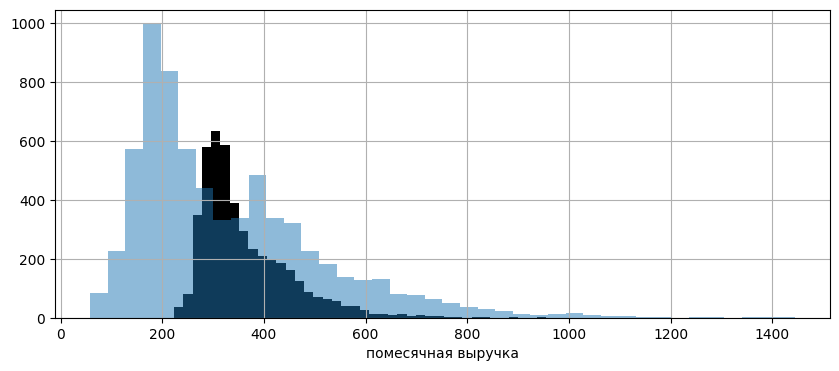

In [46]:
plt.xlabel('помесячная выручка')
total_data.loc[total_data['sub_fee'] == 199, 'earnings'].hist(
    figsize = (10, 4),
    bins = 40,
    color = 'black'
);

total_data.loc[total_data['sub_fee'] == 0, 'earnings'].hist(
    figsize = (10, 4),
    bins = 40,
    alpha = 0.5
);

**Вывод:** р-значение невероятно мало, что позволяет нам отвергнуть нулевую гипотезу и дает основания утверждать, что помесячная выручка от пользователей с подпиской больше, чем от пользователей без подписки.

### Ситуация: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Техническая команда обновила сервера, то есть к тем же серверам добавила новые функции, а значит, в файле с данными мы сможем найти две связанных между собой выборки - у них будет одинаковый размер и измерения для одних и тех же пользователей. Можно провести t-тест для парных выборок, применив такой метод: `scipy.stats.ttest_rel()`. Так как команда надеется, что количество обращений в техподдержку снизилось, в методе укажем выборки в таком порядке - сначала "до", затем "после", аргументу `alternative` дадим значение `greater`.

## Общий вывод

Мы провели исследование по данным об аренде самокатов сервиса GoFast и проверили несколько гипотез:

1. Гипотезу о том, что среднее время поездки пользователей с подпиской и без нее равны, удалось отвергнуть, выходит, что пользователи `ultra` действительно тратят больше времени на поездки.
2. Среднее расстояние поездки пользователей с подпиской `ultra` не превышает 3130 метров - расстояния, оптимального с точки зрения износа самоката.
3. Удалось отвергнуть гипотезу о том, что ежемесячная выручка от пользователей с подпиской и без нее одинаковы, что позволяет утверждать, что пользователи с подпиской `ultra` выгоднее для сервиса.

Бизнесу **выгодны** пользователи с подпиской `ultra`, поэтому увеличение их количества приведет к росту и развитию сервиса GoFast, однако оптимальное расстояние за одну поездку в разрезе износа самоката нередко превышается, особенно учитывая, что у пользователей с подпиской средняя дистанция поездки больше. Увеличение числа пользователей с подпиской может привести к рискам износа самокатов.

Если это возможно, то после проверки я бы хотела доделать дополнительное седьмое задание и соответственно дослать проект вместе с ним!)